# 绘制各类别准确率评估指标柱状图

同济子豪兄：https://space.bilibili.com/1900783

## 设置Matplotlib中文字体

In [1]:
# # windows操作系统
# plt.rcParams['font.sans-serif']=['SimHei']  # 用来正常显示中文标签 
# plt.rcParams['axes.unicode_minus']=False  # 用来正常显示负号

In [2]:
# Mac操作系统，参考 https://www.ngui.cc/51cto/show-727683.html
# 下载 simhei.ttf 字体文件
# !wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf

In [1]:
# Linux操作系统，例如 云GPU平台：https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1
# 如果遇到 SSL 相关报错，重新运行本代码块即可
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O /environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
!rm -rf /home/featurize/.cache/matplotlib

import matplotlib
matplotlib.rc("font",family='SimHei') # 中文字体

--2022-08-18 16:44:54--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Connecting to 172.16.0.13:5848... connected.
Proxy request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/environment/minico 100%[===================>]   9.58M  22.1MB/s    in 0.4s    

2022-08-18 16:44:54 (22.1 MB/s) - ‘/environment/miniconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



## 导入工具包

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 导入各类别准确率评估指标表格

In [3]:
df = pd.read_csv('各类别准确率评估指标.csv')

In [4]:
df

类别  precision    recall  f1-score  support        AP       AUC
0            哈密瓜   0.909091  0.789474  0.845070     38.0  0.927853  0.992897
1            圣女果   0.928571  0.684211  0.787879     38.0  0.892679  0.994691
2             山竹   1.000000  0.828571  0.906250     35.0  0.997550  0.999918
3             杨梅   0.864865  0.864865  0.864865     37.0  0.960977  0.995928
4             柚子   0.756757  0.756757  0.756757     37.0  0.816588  0.986253
5             柠檬   0.774194  0.827586  0.800000     29.0  0.819273  0.991363
6             桂圆   0.760000  1.000000  0.863636     38.0  0.992567  0.999697
7              梨   0.852941  0.783784  0.816901     37.0  0.921136  0.996291
8             椰子   0.944444  0.894737  0.918919     38.0  0.953389  0.997598
9             榴莲   0.935484  0.805556  0.865672     36.0  0.936241  0.993954
10           火龙果   1.000000  0.916667  0.956522     36.0  0.994949  0.999787
11           猕猴桃   0.969697  0.864865  0.914286     37.0  0.935119  0.983659
12            石榴   0.868421  0.891892  0.880000     37.0  0.949262  0.996654
13           砂糖橘   0.810811  0.857143  0.833333     35.0  0.943407  0.997756
14           胡萝卜   0.941176  0.888889  0.914286     36.0  0.966317  0.998642
15            脐橙   0.794118  0.729730  0.760563     37.0  0.877489  0.989443
16            芒果   0.750000  0.818182  0.782609     33.0  0.854325  0.991425
17            苦瓜   1.000000  0.742857  0.852459     35.0  0.994001  0.999781
18          苹果-红   0.911765  0.885714  0.898551     35.0  0.954901  0.997154
19          苹果-青   0.822222  1.000000  0.902439     37.0  0.981339  0.999300
20            草莓   0.921053  0.921053  0.921053     38.0  0.979455  0.999090
21            荔枝   0.875000  0.921053  0.897436     38.0  0.969438  0.997952
22            菠萝   0.937500  0.810811  0.869565     37.0  0.963602  0.998340
23          葡萄-白   0.935484  0.935484  0.935484     31.0  0.991701  0.999692
24          葡萄-红   0.765957  0.947368  0.847059     38.0  0.970296  0.998584
25            西瓜   0.853659  0.945946  0.897436     37.0  0.954452  0.997562
26           西红柿   0.702128  0.916667  0.795181     36.0  0.895585  0.993076
27           车厘子   1.000000  0.843750  0.915254     32.0  0.970634  0.998896
28            香蕉   0.970588  0.916667  0.942857     36.0  0.989832  0.999574
29            黄瓜   0.760870  1.000000  0.864198     35.0  0.977127  0.999042
30     macro avg   0.877226  0.866343  0.866884   1079.0  0.944383  0.996133
31  weighted avg   0.877204  0.866543  0.866931   1079.0  0.945004  0.996132

## 选择评估指标

In [9]:
# feature = 'precision'
feature = 'recall'
# feature = 'f1-score'
# feature = 'AP'
# feature = 'AUC'

## 绘制柱状图

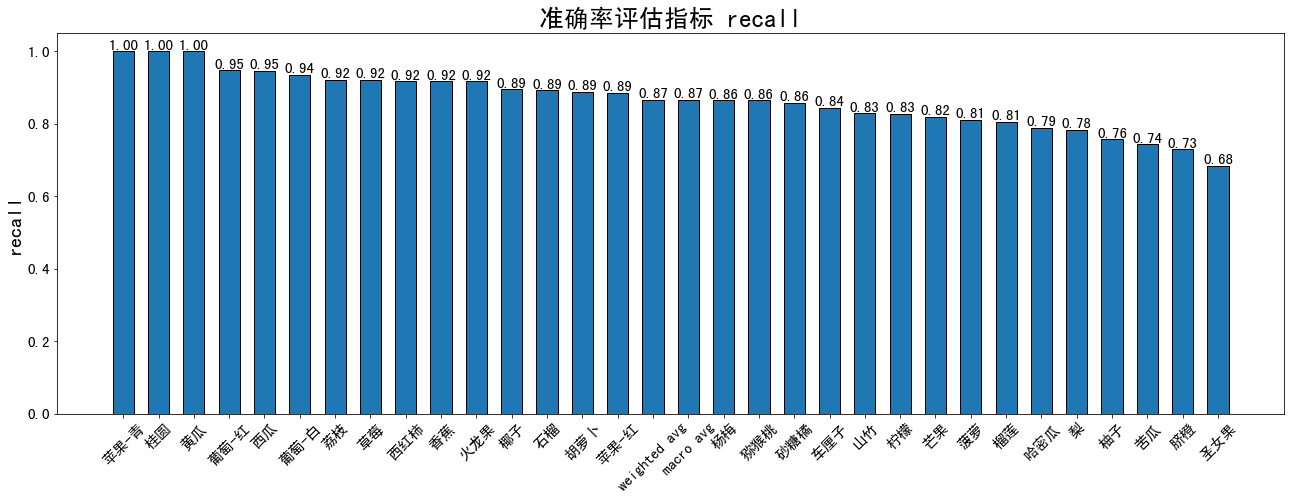

In [12]:
df_plot = df.sort_values(by=feature, ascending=False)

plt.figure(figsize=(22, 7))

x = df_plot['类别']
y = df_plot[feature]

ax = plt.bar(x, y, width=0.6, facecolor='#1f77b4', edgecolor='k')
plt.bar_label(ax, fmt='%.2f', fontsize=15) # 置信度数值

plt.xticks(rotation=45)
plt.tick_params(labelsize=15)
# plt.xlabel('类别', fontsize=20)
plt.ylabel(feature, fontsize=20)
plt.title('准确率评估指标 {}'.format(feature), fontsize=25)

plt.savefig('各类别准确率评估指标柱状图-{}.pdf'.format(feature), dpi=120, bbox_inches='tight')

plt.show()